<a href="https://colab.research.google.com/github/CristinaFlorea15/Predictia-vanzarilor-de-jocuri-video-Steam/blob/main/MiniStudy_by_publisherClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLS log Positive review Price Data**

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ + ε

class statsmodels.regression.linear_model.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GroupShuffleSplit

In [2]:
df = pd.read_csv("df_final_v3_posRev_Price_Date.csv", low_memory=False)

In [3]:
df["copiesSold_log"] = np.log1p(df["copiesSold"])

In [4]:
df.copiesSold

,copiesSold
0,1727
1,367
2,1298
3,65
4,47
...,...
67026,72
67027,647531
67028,7749
67029,633920


In [5]:
df.copiesSold_log

,copiesSold_log
0,7.454720
1,5.908083
2,7.169350
3,4.189655
4,3.871201
...,...
67026,4.290459
67027,13.380923
67028,8.955448
67029,13.359680


In [6]:
cols_to_drop = [
    "appid",
    "name",
    "copiesSold"
]

df = df.drop(columns=cols_to_drop)

In [7]:
df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67031 entries, 0 to 67030
Data columns (total 134 columns):
 #    Column               Dtype  
---   ------               -----  
 0    steam_trading_cards  bool   
 1    workshop_support     bool   
 2    has_dlc              bool   
 3    has_demo             bool   
 4    price                float64
 5    publisherClass       object 
 6    positive_reviews     int64  
 7    metacritic_category  object 
 8    achievements_bin     object 
 9    date_bins            object 
 10   hasWindows           bool   
 11   hasMac               bool   
 12   hasLinux             bool   
 13   reviewScore_bin      object 
 14   isIndie              bool   
 15   isCasual             bool   
 16   isAction             bool   
 17   isAdventure          bool   
 18   isSimulation         bool   
 19   isStrategy           bool   
 20   isRPG                bool   
 21   isEarlyAccess        bool   
 22   isFTP                bool   
 23   isSports 

In [8]:
df = pd.get_dummies(df, columns = ['publisherClass'], prefix='publisherClass', drop_first=True)
df = pd.get_dummies(df, columns = ['metacritic_category'], prefix='metacritic_category', drop_first=True)
df = pd.get_dummies(df, columns = ['date_bins'], prefix='date_bins', drop_first=True)
df = pd.get_dummies(df, columns = ['achievements_bin'], prefix='achievements_bin', drop_first=True)
df = pd.get_dummies(df, columns = ['reviewScore_bin'], prefix='reviewScore_bin', drop_first=True)

In [9]:
df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67031 entries, 0 to 67030
Data columns (total 150 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    steam_trading_cards            bool   
 1    workshop_support               bool   
 2    has_dlc                        bool   
 3    has_demo                       bool   
 4    price                          float64
 5    positive_reviews               int64  
 6    hasWindows                     bool   
 7    hasMac                         bool   
 8    hasLinux                       bool   
 9    isIndie                        bool   
 10   isCasual                       bool   
 11   isAction                       bool   
 12   isAdventure                    bool   
 13   isSimulation                   bool   
 14   isStrategy                     bool   
 15   isRPG                          bool   
 16   isEarlyAccess                  bool   
 17   isFTP                        

In [10]:
def bools_to_int(df):
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)
    print(f"Converted {len(bool_cols)} boolean columns to 0/1.")
    return df

df = bools_to_int(df)

Converted 147 boolean columns to 0/1.


In [11]:
df = df.fillna(0)

nan_count_total = df.isna().sum().sum()
print(f"Număr total de valori NaN rămase în df: {nan_count_total}")

Număr total de valori NaN rămase în df: 0


In [12]:
df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67031 entries, 0 to 67030
Data columns (total 150 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    steam_trading_cards            int64  
 1    workshop_support               int64  
 2    has_dlc                        int64  
 3    has_demo                       int64  
 4    price                          float64
 5    positive_reviews               int64  
 6    hasWindows                     int64  
 7    hasMac                         int64  
 8    hasLinux                       int64  
 9    isIndie                        int64  
 10   isCasual                       int64  
 11   isAction                       int64  
 12   isAdventure                    int64  
 13   isSimulation                   int64  
 14   isStrategy                     int64  
 15   isRPG                          int64  
 16   isEarlyAccess                  int64  
 17   isFTP                        

In [13]:
df.to_csv("df_final_v3_adjusted_for_ols_logn.csv", index=False)

# **impartirea setului de date OLS**

In [16]:
from sklearn.model_selection import GroupShuffleSplit

in_path = "df_final_v3_adjusted_for_ols_logn.csv"
df = pd.read_csv(in_path, low_memory=False)

target = "copiesSold_log"

col_AAA = "publisherClass_AAA"
col_HOB = "publisherClass_Hobbyist"
col_IND = "publisherClass_Indie"

missing = [c for c in [target, col_AAA, col_HOB, col_IND] if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in file: {missing}")

df["publisherGroup"] = "AA"
df.loc[df[col_IND] == 1, "publisherGroup"] = "Indie"
df.loc[df[col_HOB] == 1, "publisherGroup"] = "Hobbyist"
df.loc[df[col_AAA] == 1, "publisherGroup"] = "AAA"

df = df.drop(columns=[col_AAA, col_HOB, col_IND])

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

def make_split(df_grp):
    X = df_grp.drop(columns=[target, "publisherGroup"])
    y = df_grp[target]
    groups_hash = pd.util.hash_pandas_object(X, index=False).astype("int64")
    train_idx, valid_idx = next(gss.split(X, y, groups=groups_hash))
    return X.iloc[train_idx].copy(), X.iloc[valid_idx].copy(), y.iloc[train_idx].copy(), y.iloc[valid_idx].copy()

X_train_Hobbyist, X_valid_Hobbyist, y_train_Hobbyist, y_valid_Hobbyist = make_split(df[df["publisherGroup"]=="Hobbyist"].copy())
X_train_Indie,    X_valid_Indie,    y_train_Indie,    y_valid_Indie    = make_split(df[df["publisherGroup"]=="Indie"].copy())
X_train_AA,       X_valid_AA,       y_train_AA,       y_valid_AA       = make_split(df[df["publisherGroup"]=="AA"].copy())
X_train_AAA,      X_valid_AAA,      y_train_AAA,      y_valid_AAA      = make_split(df[df["publisherGroup"]=="AAA"].copy())

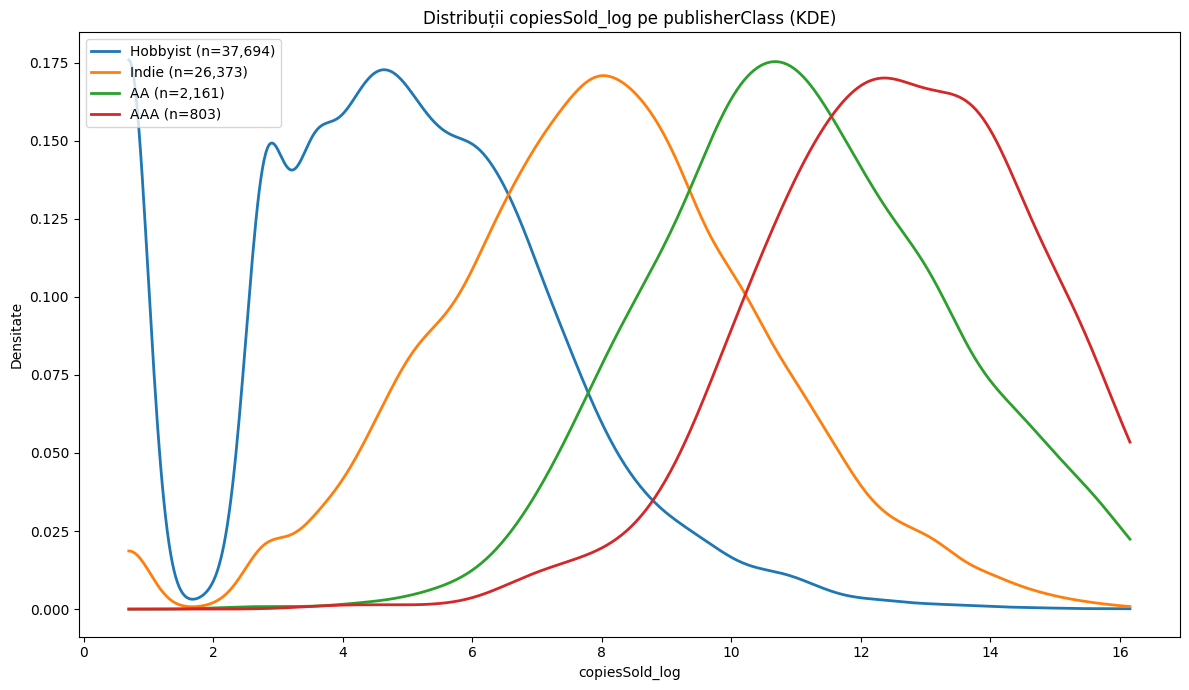

In [30]:
from scipy.stats import gaussian_kde

in_path = "df_final_v3_adjusted_for_ols_logn.csv"
df = pd.read_csv(in_path, low_memory=False)

target = "copiesSold_log"
col_AAA = "publisherClass_AAA"
col_HOB = "publisherClass_Hobbyist"
col_IND = "publisherClass_Indie"

df["publisherGroup"] = "AA"
df.loc[df[col_IND] == 1, "publisherGroup"] = "Indie"
df.loc[df[col_HOB] == 1, "publisherGroup"] = "Hobbyist"
df.loc[df[col_AAA] == 1, "publisherGroup"] = "AAA"

groups = ["Hobbyist", "Indie", "AA", "AAA"]
series = {}
for g in groups:
    s = df.loc[df["publisherGroup"] == g, target].astype(float)
    s = s.replace([np.inf, -np.inf], np.nan).dropna()
    series[g] = s

all_vals = pd.concat(series.values(), axis=0)
xmin, xmax = all_vals.quantile([0.001, 0.999]).values
xs = np.linspace(xmin, xmax, 600)

plt.figure(figsize=(12, 7))

for g in groups:
    s = series[g]
    if len(s) < 5:
        continue

    kde = gaussian_kde(s.values)
    ys = kde(xs)

    plt.plot(xs, ys, linewidth=2, label=f"{g} (n={len(s):,})")

plt.title("Distribuții copiesSold_log pe publisherClass (KDE)")
plt.xlabel("copiesSold_log")
plt.ylabel("Densitate")
plt.legend()
plt.tight_layout()
plt.show()

Studiu pentru Hobbyist

In [17]:
X_train_const = sm.add_constant(X_train_Hobbyist, has_constant="add")
X_valid_const = sm.add_constant(X_valid_Hobbyist, has_constant="add")

ols_hobbyist = sm.OLS(y_train_Hobbyist, X_train_const).fit()
print(ols_hobbyist.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     262.2
Date:                Sun, 25 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:01:46   Log-Likelihood:                -58327.
No. Observations:               30118   AIC:                         1.169e+05
Df Residuals:                   29988   BIC:                         1.180e+05
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [20]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom) * 100

X_valid_const = sm.add_constant(X_valid_Hobbyist, has_constant="add")

y_pred_log = ols_hobbyist.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid_Hobbyist)

mae_c   = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c  = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Hobbyist | Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")

--- Hobbyist | Validation metrics (copiesSold, back-transformed) ---
MAE:  52,439
RMSE: 3,708,108
sMAPE:102.99%


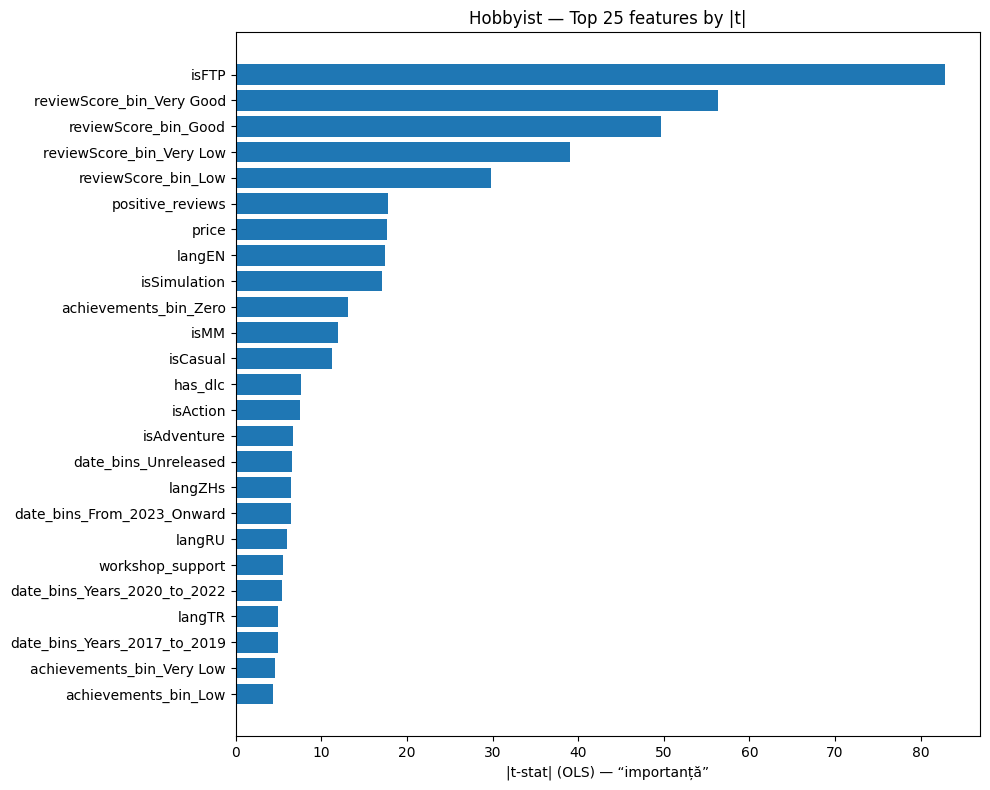

,feature,coef,t,p
18,isFTP,2.529702,82.792488,0.000000e+00
145,reviewScore_bin_Very Good,1.787236,56.334683,0.000000e+00
143,reviewScore_bin_Good,1.515604,49.681352,0.000000e+00
146,reviewScore_bin_Very Low,-1.139136,-39.049252,0.000000e+00
144,reviewScore_bin_Low,0.901373,29.840163,7.807267e-193
6,positive_reviews,0.000103,17.784114,2.159119e-70
5,price,-0.019243,-17.633511,3.049194e-69
26,langEN,-0.911393,-17.402315,1.701886e-67
14,isSimulation,0.454647,17.104485,2.805596e-65
142,achievements_bin_Zero,-0.545154,-13.141343,2.451379e-39


In [22]:
imp = pd.DataFrame({
    "feature": ols_hobbyist.params.index,
    "coef": ols_hobbyist.params.values,
    "t": ols_hobbyist.tvalues.values,
    "p": ols_hobbyist.pvalues.values,
})

imp = imp[imp["feature"] != "const"].copy()

imp["abs_t"] = imp["t"].abs()
imp = imp.sort_values("abs_t", ascending=False)

TOP = 25
imp_top = imp.head(TOP).sort_values("abs_t")

plt.figure(figsize=(10, 8))
plt.barh(imp_top["feature"], imp_top["abs_t"])
plt.xlabel("|t-stat| (OLS) — “importanță”")
plt.title(f"Hobbyist — Top {TOP} features by |t|")
plt.tight_layout()
plt.show()

imp_top[::-1][["feature", "coef", "t", "p"]].head(10)

Indie

In [23]:
X_train_const = sm.add_constant(X_train_Indie, has_constant="add")
X_valid_const = sm.add_constant(X_valid_Indie, has_constant="add")

ols_indie = sm.OLS(y_train_Indie, X_train_const).fit()
print(ols_indie.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sun, 25 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:11:59   Log-Likelihood:                -42049.
No. Observations:               21094   AIC:                         8.434e+04
Df Residuals:                   20975   BIC:                         8.528e+04
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

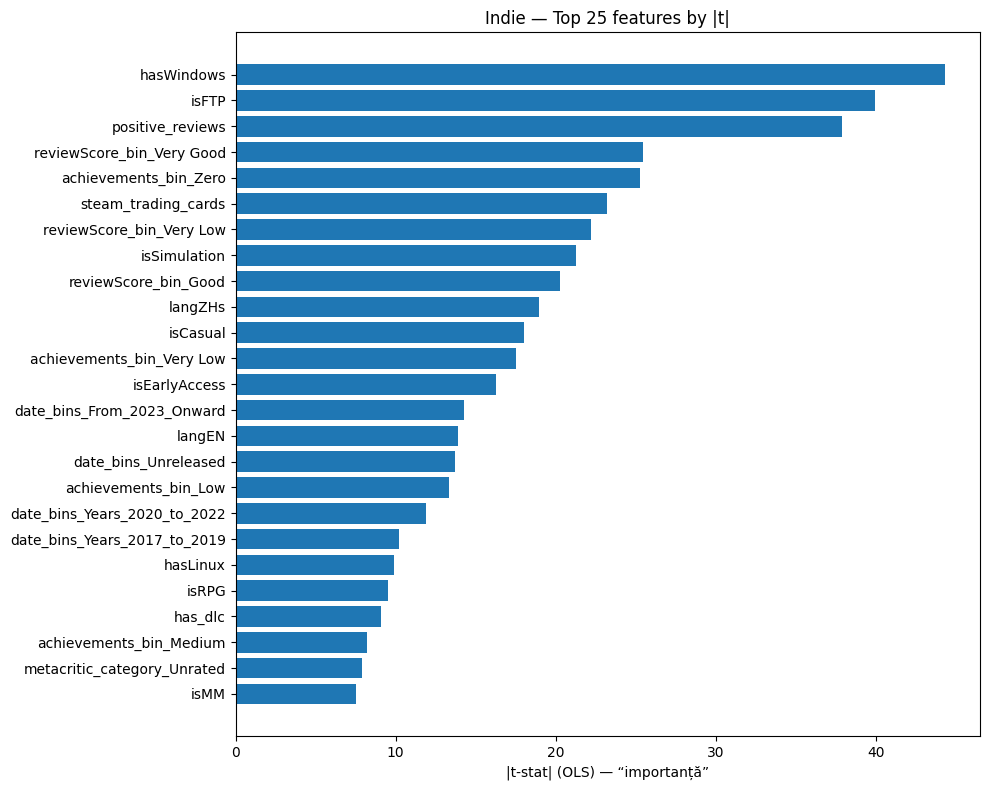

,feature,coef,t,p
7,hasWindows,5.460963,44.299050,0.000000e+00
18,isFTP,2.395399,39.952372,0.000000e+00
6,positive_reviews,0.000087,37.911383,2.922461e-304
145,reviewScore_bin_Very Good,1.125876,25.454112,8.691408e-141
142,achievements_bin_Zero,-0.994186,-25.236649,1.841848e-138
1,steam_trading_cards,0.873108,23.191358,1.672149e-117
146,reviewScore_bin_Very Low,-1.284884,-22.176965,9.911781e-108
14,isSimulation,0.642906,21.281271,1.905236e-99
143,reviewScore_bin_Good,0.891219,20.253878,2.401089e-90
27,langZHs,0.761588,18.961542,1.640617e-79


In [24]:
imp = pd.DataFrame({
    "feature": ols_indie.params.index,
    "coef": ols_indie.params.values,
    "t": ols_indie.tvalues.values,
    "p": ols_indie.pvalues.values,
})

imp = imp[imp["feature"] != "const"].copy()

imp["abs_t"] = imp["t"].abs()
imp = imp.sort_values("abs_t", ascending=False)

TOP = 25
imp_top = imp.head(TOP).sort_values("abs_t")

plt.figure(figsize=(10, 8))
plt.barh(imp_top["feature"], imp_top["abs_t"])
plt.xlabel("|t-stat| (OLS) — “importanță”")
plt.title(f"Indie — Top {TOP} features by |t|")
plt.tight_layout()
plt.show()

imp_top[::-1][["feature", "coef", "t", "p"]].head(10)

AA

In [25]:
X_train_const = sm.add_constant(X_train_AA, has_constant="add")
X_valid_const = sm.add_constant(X_valid_AA, has_constant="add")

ols_aa = sm.OLS(y_train_AA, X_train_const).fit()
print(ols_aa.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.62
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          9.13e-256
Time:                        21:12:31   Log-Likelihood:                -3152.3
No. Observations:                1728   AIC:                             6477.
Df Residuals:                    1642   BIC:                             6946.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

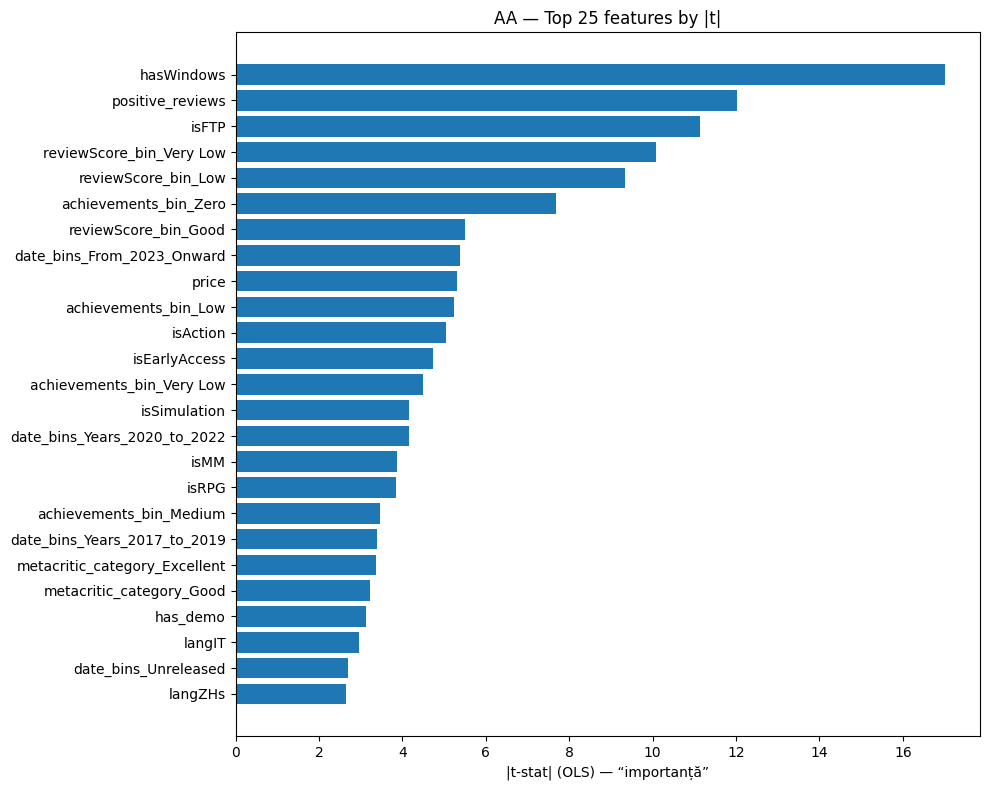

,feature,coef,t,p
7,hasWindows,6.620883,17.000958,7.820217e-60
6,positive_reviews,0.000008,12.025762,5.498955e-32
18,isFTP,2.448205,11.131906,8.432466e-28
146,reviewScore_bin_Very Low,-2.543942,-10.072161,3.404674e-23
144,reviewScore_bin_Low,-1.765101,-9.343093,2.944193e-20
142,achievements_bin_Zero,-0.909314,-7.670898,2.908621e-14
143,reviewScore_bin_Good,-0.976405,-5.491846,4.601907e-08
133,date_bins_From_2023_Onward,-2.108427,-5.389335,8.098869e-08
5,price,0.018707,5.313187,1.224793e-07
139,achievements_bin_Low,-0.717824,-5.225519,1.958897e-07


In [26]:
imp = pd.DataFrame({
    "feature": ols_aa.params.index,
    "coef": ols_aa.params.values,
    "t": ols_aa.tvalues.values,
    "p": ols_aa.pvalues.values,
})

imp = imp[imp["feature"] != "const"].copy()

imp["abs_t"] = imp["t"].abs()
imp = imp.sort_values("abs_t", ascending=False)

TOP = 25
imp_top = imp.head(TOP).sort_values("abs_t")

plt.figure(figsize=(10, 8))
plt.barh(imp_top["feature"], imp_top["abs_t"])
plt.xlabel("|t-stat| (OLS) — “importanță”")
plt.title(f"AA — Top {TOP} features by |t|")
plt.tight_layout()
plt.show()

imp_top[::-1][["feature", "coef", "t", "p"]].head(10)

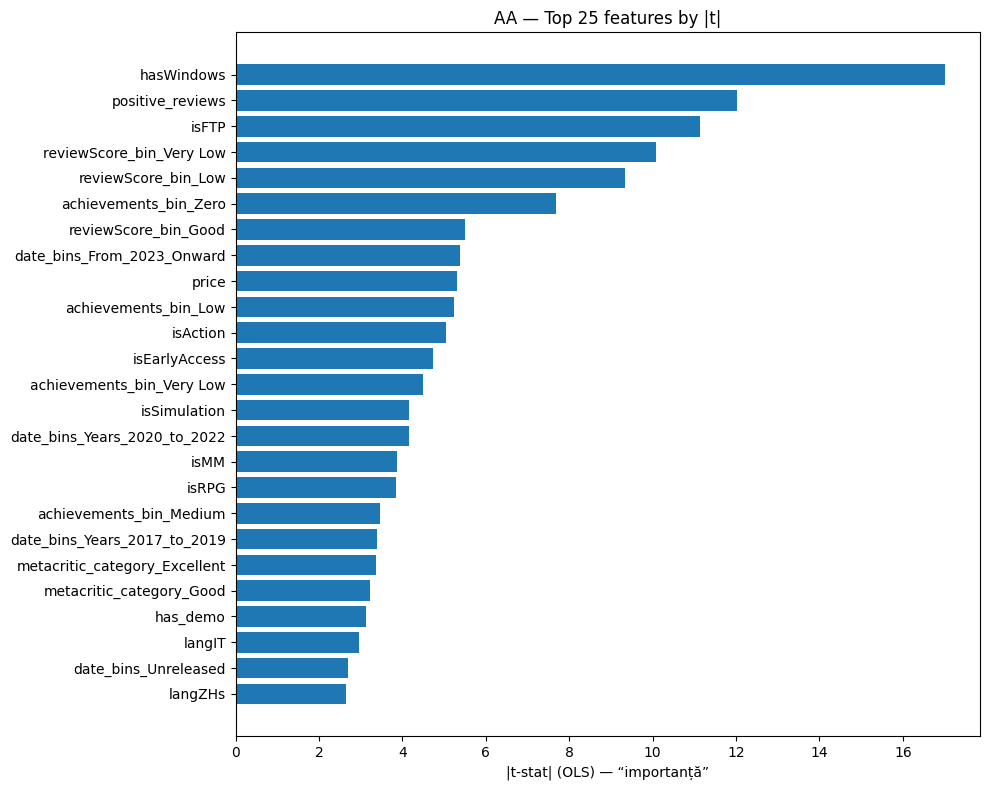

,feature,coef,t,p
7,hasWindows,6.620883,17.000958,7.820217e-60
6,positive_reviews,0.000008,12.025762,5.498955e-32
18,isFTP,2.448205,11.131906,8.432466e-28
146,reviewScore_bin_Very Low,-2.543942,-10.072161,3.404674e-23
144,reviewScore_bin_Low,-1.765101,-9.343093,2.944193e-20
142,achievements_bin_Zero,-0.909314,-7.670898,2.908621e-14
143,reviewScore_bin_Good,-0.976405,-5.491846,4.601907e-08
133,date_bins_From_2023_Onward,-2.108427,-5.389335,8.098869e-08
5,price,0.018707,5.313187,1.224793e-07
139,achievements_bin_Low,-0.717824,-5.225519,1.958897e-07


In [33]:
imp = pd.DataFrame({
    "feature": ols_aa.params.index,
    "coef": ols_aa.params.values,
    "t": ols_aa.tvalues.values,
    "p": ols_aa.pvalues.values,
})

imp = imp[imp["feature"] != "const"].copy()
imp["abs_t"] = imp["t"].abs()
imp = imp.sort_values("abs_t", ascending=False)

TOP = 25
imp_top = imp.head(TOP).sort_values("abs_t")

plt.figure(figsize=(10, 8))
plt.barh(imp_top["feature"], imp_top["abs_t"])
plt.xlabel("|t-stat| (OLS) — “importanță”")
plt.title(f"AA — Top {TOP} features by |t|")
plt.tight_layout()
plt.show()

imp_top[::-1][["feature", "coef", "t", "p"]].head(10)

AAA

In [28]:
X_train_const = sm.add_constant(X_train_AAA, has_constant="add")
X_valid_const = sm.add_constant(X_valid_AAA, has_constant="add")

ols_aaa = sm.OLS(y_train_AAA, X_train_const).fit()
print(ols_aaa.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     13.96
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           4.15e-88
Time:                        21:13:08   Log-Likelihood:                -1084.8
No. Observations:                 642   AIC:                             2322.
Df Residuals:                     566   BIC:                             2661.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

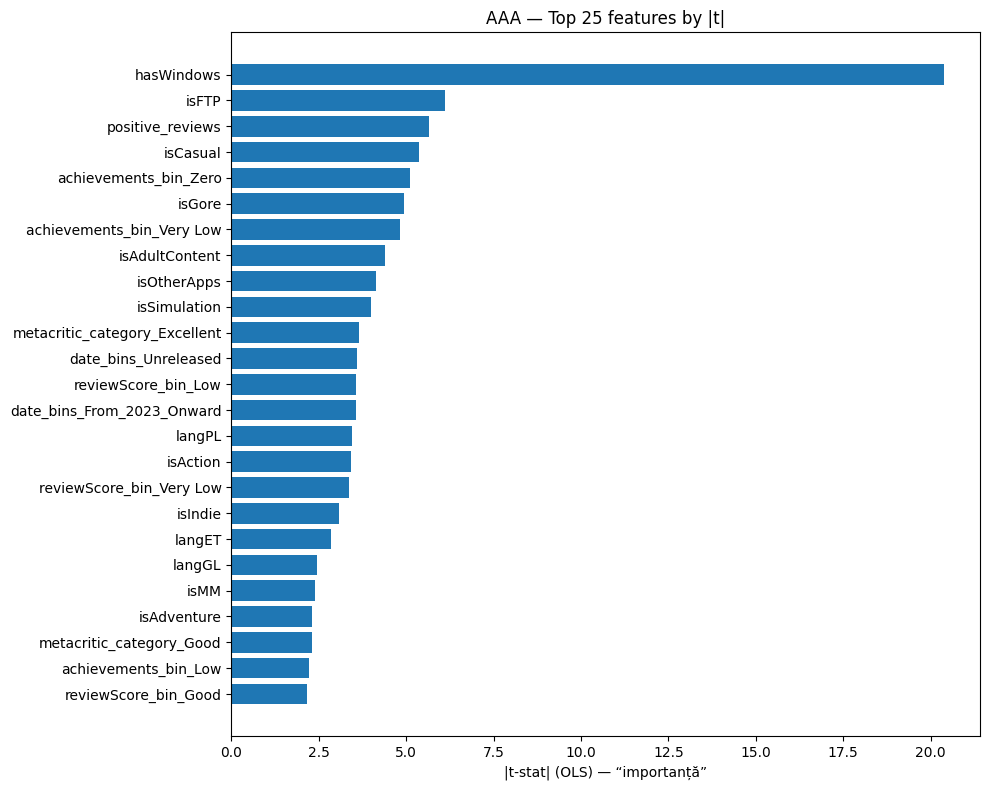

,feature,coef,t,p
7,hasWindows,6.343025e+00,20.392991,1.014173e-69
18,isFTP,2.236004e+00,6.110185,1.852584e-09
6,positive_reviews,3.303266e-06,5.663706,2.358916e-08
11,isCasual,-1.288612e+00,-5.369335,1.155152e-07
142,achievements_bin_Zero,-9.143221e-01,-5.122107,4.149507e-07
23,isGore,5.701720e-15,4.930872,1.077285e-06
141,achievements_bin_Very Low,-2.151371e+01,-4.815231,1.889629e-06
24,isAdultContent,1.374700e-14,4.393523,1.331756e-05
25,isOtherApps,2.071684e-14,4.147657,3.874546e-05
14,isSimulation,7.693164e-01,3.981725,7.733412e-05


In [29]:
imp = pd.DataFrame({
    "feature": ols_aaa.params.index,
    "coef": ols_aaa.params.values,
    "t": ols_aaa.tvalues.values,
    "p": ols_aaa.pvalues.values,
})

imp = imp[imp["feature"] != "const"].copy()

imp["abs_t"] = imp["t"].abs()
imp = imp.sort_values("abs_t", ascending=False)

TOP = 25
imp_top = imp.head(TOP).sort_values("abs_t")

plt.figure(figsize=(10, 8))
plt.barh(imp_top["feature"], imp_top["abs_t"])
plt.xlabel("|t-stat| (OLS) — “importanță”")
plt.title(f"AAA — Top {TOP} features by |t|")
plt.tight_layout()
plt.show()

imp_top[::-1][["feature", "coef", "t", "p"]].head(10)